## Processus de tri des clients

## 1. **Chargement et aperçu des données** (collecte)

In [146]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns


In [147]:
df = pd.read_csv("C:/Users/HP/Desktop/DATABOOTCAMP/Rush3/Credit_Data_Fichier Clients.csv")
print(df.head())

   month  credit_amount  credit_term  age     sex  \
0      1           7000           12   39    male   
1      1          19000            6   20    male   
2      1          29000           12   23  female   
3      1          10000           12   30    male   
4      1          14500           12   25  female   

                     education          product_type  having_children_flg  \
0  Secondary special education           Cell phones                    0   
1  Secondary special education  Household appliances                    1   
2  Secondary special education  Household appliances                    0   
3  Secondary special education           Cell phones                    1   
4             Higher education           Cell phones                    0   

   region  income family_status  phone_operator  is_client  bad_client_target  
0       2   21000       Another               0          0                  0  
1       2   17000       Another               3          1

In [148]:
print("Valeurs manquantes dans le DF: ")
print(df.isnull().values.any())

Valeurs manquantes dans le DF: 
False


Aucunes valeurs manquantes dans le DataFrame.

In [149]:
print("Afficher les valeurs de la colonnes product_type : ")
print(df['product_type'].unique())

Afficher les valeurs de la colonnes product_type : 
['Cell phones' 'Household appliances' 'Furniture' 'Computers'
 'Cosmetics and beauty services' 'Clothing' 'Windows & Doors' 'Fitness'
 'Tourism' 'Medical services' 'Audio & Video' 'Jewelry'
 'Construction Materials' 'Boats' 'Auto' 'Garden equipment' 'Training'
 "Childen's goods" 'Music' 'Sporting goods' 'Repair Services'
 'Fishing and hunting supplies']


## **Analyse exploratoire**
Comprendre les relations entre les variables et la cible **'bad_client_target'**
- Un client déjà connu par la banque (is_client=1) est-il moins risqué qu'un autre (is_client=0) ? 

In [150]:
df.groupby('is_client')['bad_client_target'].mean()


is_client
0    0.074890
1    0.139155
Name: bad_client_target, dtype: float64

D'aprés ces résultats, les clients déjà connu par la banque ont deux fois plus de chance d'être de mauvais clients.

- Vérification de la taille des groupes (is_client=0 et is_client=1)

In [151]:
df.groupby('is_client')['bad_client_target'].agg(['count', 'sum', 'mean'])


,count,sum,mean
is_client,,,
0,681,51,0.074890
1,1042,145,0.139155


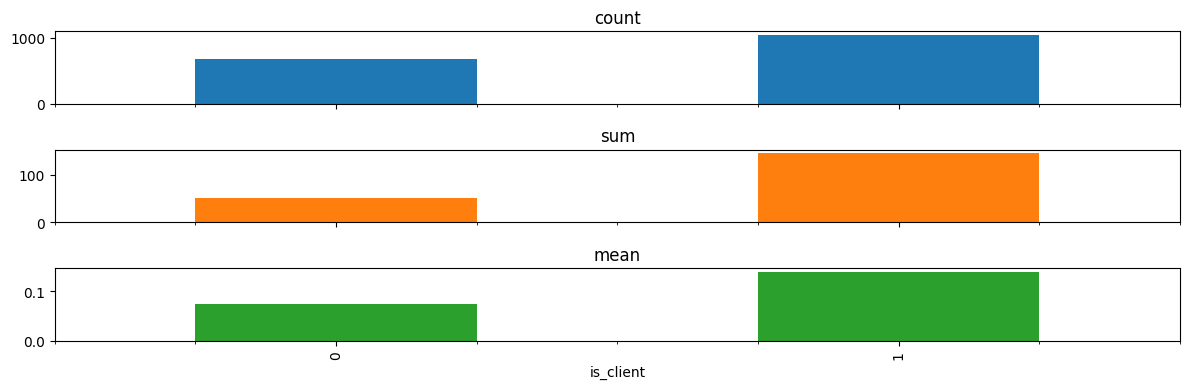

In [152]:
df.groupby('is_client')['bad_client_target'].agg(['count', 'sum', 'mean']).plot(kind='bar', subplots=True, figsize=(12, 4), legend=False)
plt.tight_layout()
plt.show()

Les deux groupes ont une taille suffisante donc les clients de la banque **(is_client=1)** sont bel et bien plus à risque d'être de mauvais clients que les nouveaux clients.

In [153]:
df.groupby('product_type')['bad_client_target'].mean()

product_type
Audio & Video                    0.000000
Auto                             0.142857
Boats                            0.090909
Cell phones                      0.226908
Childen's goods                  0.000000
Clothing                         0.045455
Computers                        0.044944
Construction Materials           0.133333
Cosmetics and beauty services    0.090909
Fishing and hunting supplies     0.000000
Fitness                          0.000000
Furniture                        0.048780
Garden equipment                 0.000000
Household appliances             0.076433
Jewelry                          0.222222
Medical services                 0.037037
Music                            0.000000
Repair Services                  0.333333
Sporting goods                   0.000000
Tourism                          0.054054
Training                         0.000000
Windows & Doors                  0.042553
Name: bad_client_target, dtype: float64

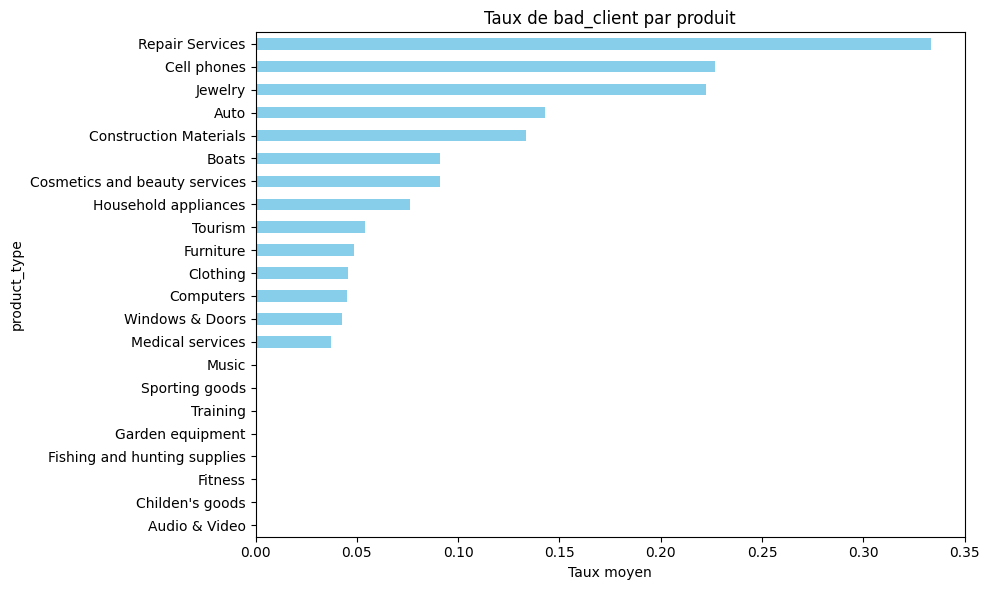

In [154]:
df.groupby('product_type')['bad_client_target'].mean().sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel('Taux moyen')
plt.title('Taux de bad_client par produit')
plt.tight_layout()
plt.show()

Les produits à caractère **consommation rapide / non essentiel (téléphones, bijoux, services de réparation, etc.)** sont associés à un risque plus élevé.

Les produits plus long terme ou nécessaires **(ordinateur, vêtements, électroménager, santé)** montrent un taux de défaut bien plus bas.
Quant aux produits à 0 une verification s'impose, afin de confirmer si ce résultat est lié à la rareté du produit ou à d'autres facteurs (pertes).

In [155]:
df['product_type'].value_counts()

product_type
Cell phones                      498
Household appliances             471
Computers                        178
Furniture                        164
Clothing                          88
Cosmetics and beauty services     55
Windows & Doors                   47
Tourism                           37
Jewelry                           36
Construction Materials            30
Medical services                  27
Fitness                           25
Auto                              21
Boats                             11
Training                          10
Audio & Video                      9
Sporting goods                     6
Garden equipment                   3
Repair Services                    3
Childen's goods                    2
Music                              1
Fishing and hunting supplies       1
Name: count, dtype: int64

Le produit **“Fitness”** apparaît 25 fois dans l’échantillon, et aucun des clients de ce groupe n’est classé comme “mauvais client”.
Ce résultat pourrait traduire une clientèle plus stable ou des montants de crédit faibles.

On note aussi que la majorité des crédits sont fait pour des Téléphones (498).

Cependant, avec un effectif limité, il est aussi possible qu’il s’agisse d’un effet statistique.
- Vérifier quelle clientèle est attiré par ce produit (client ou pas client, catégorie, income)

In [156]:
df[df['product_type'] == 'Fitness']['is_client'].value_counts(normalize=True)

is_client
1    0.56
0    0.44
Name: proportion, dtype: float64

Le produit **“Fitness”** représente 25 observations, dont 56 % de clients déjà connus de la banque.
Aucun défaut de paiement n’a été observé pour ce segment, ce qui peut traduire une clientèle à faible risque.
Néanmoins, la taille réduite de l’échantillon ne permet pas de conclure définitivement : il pourrait s’agir d’un effet statistique ou d’un segment naturellement plus stable.

In [157]:
df[df['product_type'] == 'Fitness']['age'].value_counts(normalize=True)

age
25    0.16
54    0.08
28    0.08
21    0.08
27    0.08
23    0.04
40    0.04
22    0.04
57    0.04
31    0.04
26    0.04
47    0.04
49    0.04
36    0.04
34    0.04
32    0.04
29    0.04
59    0.04
Name: proportion, dtype: float64

In [158]:
df[df['product_type'] == 'Fitness']['income'].value_counts(normalize=True)

income
31000     0.24
26000     0.12
61000     0.12
36000     0.08
51000     0.08
41000     0.04
21000     0.04
56000     0.04
151000    0.04
91000     0.04
66000     0.04
11000     0.04
81000     0.04
27000     0.04
Name: proportion, dtype: float64

Les clients ayant contracté un crédit pour un produit “Fitness” sont majoritairement des jeunes adultes à revenus moyens.
Leur profil est homogène, équilibré et relativement stable, ce qui peut expliquer l’absence de défaut observée dans ce segment.
**Ces résultats sont indicatifs, pas définitifs.**

In [159]:
df.groupby('phone_operator')['bad_client_target'].mean()

phone_operator
0    0.123134
1    0.121622
2    0.088328
3    0.101695
4    0.111111
Name: bad_client_target, dtype: float64

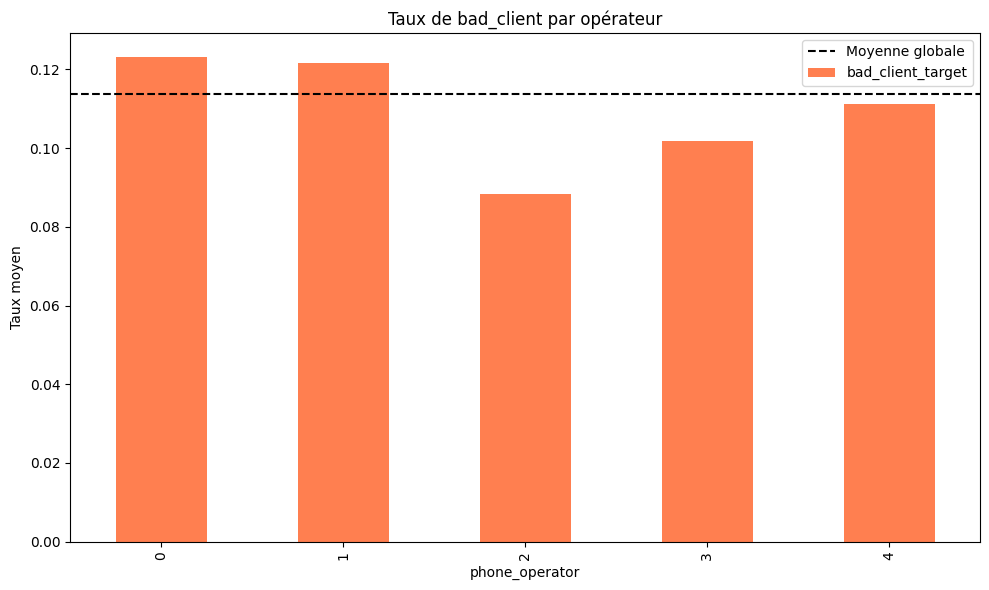

In [160]:
mean_op = df.groupby('phone_operator')['bad_client_target'].mean()
ax = mean_op.plot(kind='bar', figsize=(10, 6), color='coral')
ax.axhline(df['bad_client_target'].mean(), color='black', linestyle='--', label='Moyenne globale')
plt.ylabel('Taux moyen')
plt.title('Taux de bad_client par opérateur')
plt.legend()
plt.tight_layout()
plt.show()

Les clients avec l'opérateur 2 ont moins de chance d'être de mauvais clients. 

In [161]:
pd.set_option('display.max_rows', None)
df.groupby('age')['bad_client_target'].mean()df['product_type'].value_counts()

SyntaxError: invalid syntax (2819889020.py, line 2)

Les jeunes (18–25 ans) ont les taux de défaut les plus élevés (par exemple 100 % à 18 ans, ~20 % à 25 ans).

Entre 30 et 55 ans, les taux tournent autour de 5 à 15 %, donc une zone plus stable.

Après 58 ans, le taux de défaut tombe à 0 %, probablement parce que :

il y a peu d’observations dans ces tranches, et les clients plus âgés sont souvent plus prudents financièrement.

**Hypothèse** : Les jeunes adultes semblent plus enclins à devenir de “mauvais clients”, probablement à cause d’une stabilité financière encore fragile (revenus récents, manque d’historique bancaire, etc.).
À l’inverse, les tranches d’âge supérieures montrent des comportements plus fiables.

- Croisement entre l'age et le type de produit pour verifier les hypothèses précédentes : (skip à la fin pour le résumé)

In [162]:
df.groupby(['age', 'product_type'])['bad_client_target'].mean()

age  product_type                 
18   Cell phones                      1.000000
19   Cell phones                      0.100000
     Household appliances             0.500000
     Jewelry                          1.000000
20   Auto                             0.000000
     Cell phones                      0.222222
     Clothing                         0.000000
     Computers                        0.000000
     Construction Materials           0.000000
     Household appliances             0.000000
     Jewelry                          1.000000
     Medical services                 0.000000
     Tourism                          0.500000
     Windows & Doors                  0.000000
21   Cell phones                      0.192308
     Clothing                         0.000000
     Computers                        0.166667
     Cosmetics and beauty services    0.000000
     Fitness                          0.000000
     Furniture                        0.250000
     Household appliances

## **Constats principaux :**

Les jeunes (18–26 ans) sont ceux qui cumulent le plus de défauts, surtout sur les produits comme :

- Cell phones (jusqu’à 27 % de mauvais clients),

- Jewelry (jusqu’à 50–100 % selon l’âge),

- Household appliances (autour de 13–28 %),

- et parfois Tourism (jusqu’à 50 %).

Ces produits sont souvent des biens de consommation à court terme ou non essentiels, ce qui peut indiquer un comportement d’achat plus risqué.

Entre 30 et 45 ans, les taux sont globalement plus faibles, sauf quelques cas isolés (comme Repair Services ou Cosmetics à certains âges).
 Cela correspond à une stabilité financière plus marquée, mais certaines dépenses “plaisir” (ex : beauté, réparations, bijoux) peuvent encore générer du risque.

Après 50 ans, on retrouve des taux très faibles voire nuls.
Ces clients semblent plus responsables ou plus sélectifs dans leurs crédits.

**Résumé** : L’analyse croisée entre l’âge et le type de produit révèle que le risque de mauvais client est principalement concentré chez les jeunes adultes (18–26 ans), notamment pour des crédits liés à des biens de consommation comme les téléphones, bijoux ou appareils ménagers.
À l’inverse, les clients plus âgés présentent des taux de défaut nettement plus faibles, suggérant une meilleure stabilité financière et une plus grande prudence dans la souscription de crédits.
On observe donc une corrélation entre la jeunesse du client, le type de produit consommé, et la probabilité de défaut.

## **Modélisation - Phase prédictive**

L’objectif ici est de prédire la probabilité qu’un client soit “mauvais payeur” (bad_client_target = 1) à partir de ses caractéristiques (âge, revenu, type de produit, etc.)

Pour cela on a choisis la regression logistique car il s’agit d’un modèle de classification binaire, parfaitement adapté pour prédire deux catégories (“bon client” / “mauvais client”).

Elle permet d’obtenir des probabilités d’appartenance à chaque classe.

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

- Preparation des données : 

In [164]:
# Variables explicatives et cible
X = df[['age', 'income', 'credit_term', 'credit_amount', 'product_type', 'education']]
y = df['bad_client_target']

# Découpage en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


- Encodage et équilibrage :

Le jeu de données contient beaucoup plus de “bons clients” que de “mauvais clients”.
Un modèle non équilibré pourrait toujours prédire la classe majoritaire, ce qui donnerait de fausses bonnes performances.

Pour contrer cela, on utilise **class_weight='balanced'**, qui ajuste automatiquement les poids inversément à la fréquence des classe

In [165]:
# Encodage des variables catégorielles
categorical_features = ['product_type', 'education']
numeric_features = ['age', 'income', 'credit_amount', 'credit_term']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

# Pipeline complet
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=2000, class_weight='balanced'))
])


In [166]:
#Entrainement du modèle
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


              precision    recall  f1-score   support

           0       0.93      0.68      0.79       306
           1       0.20      0.62      0.30        39

    accuracy                           0.68       345
   macro avg       0.57      0.65      0.54       345
weighted avg       0.85      0.68      0.73       345



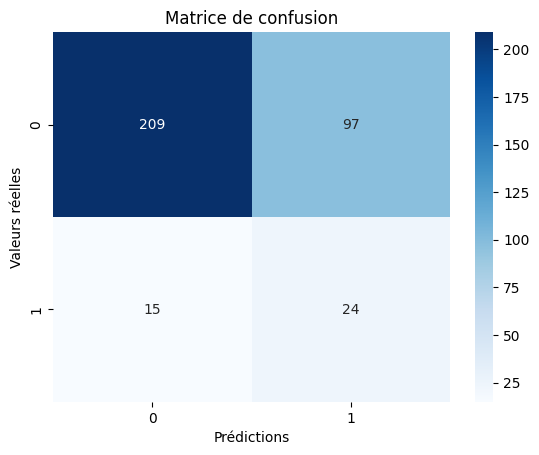

AUC ROC : 0.7


In [167]:
# Prédictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Rapport de classification
print(classification_report(y_test, y_pred, zero_division=0))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.show()

# Score ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("AUC ROC :", round(roc_auc, 3))


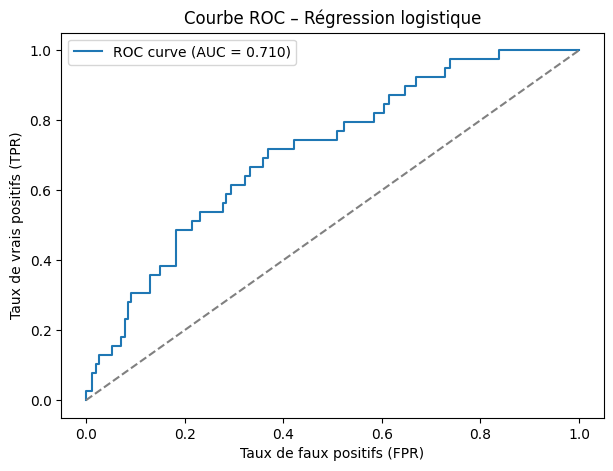

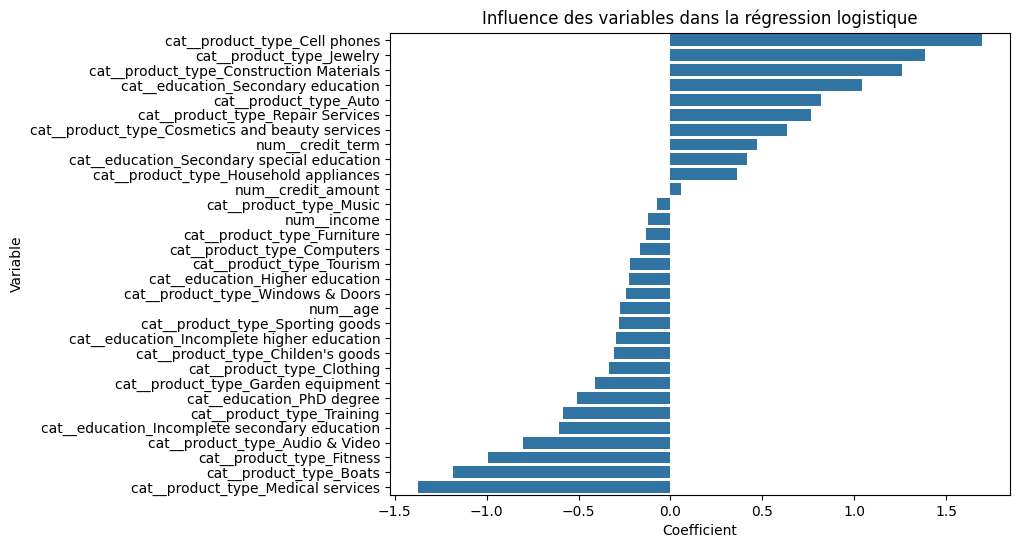

In [141]:
# Récupération des coefficients
coeffs = model.named_steps['classifier'].coef_[0]
features = model.named_steps['preprocessor'].get_feature_names_out()

importance = pd.DataFrame({'Variable': features, 'Coefficient': coeffs})
importance.sort_values(by='Coefficient', ascending=False, inplace=True)

plt.figure(figsize=(8,6))
sns.barplot(data=importance, x='Coefficient', y='Variable')
plt.title('Influence des variables dans la régression logistique')
plt.show()


La régression logistique parvient à détecter une part importante des mauvais clients (rappel = 0.62), tout en gardant une précision correcte sur les bons clients.
Cependant, elle génère encore beaucoup de fausses alertes (précision faible sur la classe minoritaire).
L’AUC de 0.7 montre que le modèle possède une capacité de discrimination raisonnable.

In [142]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

smote = SMOTE(random_state=42)
model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', LogisticRegression(max_iter=2000))
])
model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


              precision    recall  f1-score   support

           0       0.93      0.69      0.79       306
           1       0.20      0.62      0.30        39

    accuracy                           0.68       345
   macro avg       0.57      0.65      0.55       345
weighted avg       0.85      0.68      0.74       345



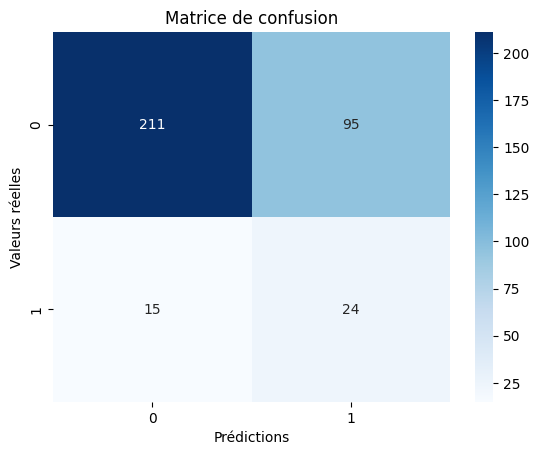

AUC ROC : 0.696


In [143]:
# Prédictions
y_pred2 = model.predict(X_test)
y_proba2 = model.predict_proba(X_test)[:, 1]

# Rapport de classification
print(classification_report(y_test, y_pred2, zero_division=0))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.show()

# Score ROC AUC
roc_auc = roc_auc_score(y_test, y_proba2)
print("AUC ROC :", round(roc_auc, 3))


In [126]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2', None],  # On évite 'l1' et 'elasticnet' pour simplifier
    'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}


grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("Meilleur AUC ROC :", round(roc_auc, 3))
print("Meilleurs paramètres :", grid_search.best_params_)


Meilleur AUC ROC : 0.71
Meilleurs paramètres : {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}


- Validation croisée : 

In [130]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
print("AUC ROC moyen (CV) :", round(scores.mean(), 3))


AUC ROC moyen (CV) : 0.735


Meilleur score obtenu jusqu'à maintenant.

- Analyse des erreurs : 

In [131]:
errors = X_test[y_test != y_pred]
print(errors[['age', 'income', 'credit_amount', 'product_type']].head())


      age  income  credit_amount          product_type
937    36   21000          40500  Household appliances
573    57   10000          31000           Cell phones
309    22   13000          30000  Household appliances
1584   29   38000          31000           Cell phones
1071   27   31000          13000           Cell phones


Les erreurs concernent souvent des jeunes clients (22-29 ans) ou des montants de crédit élevés par rapport au revenu.
Le type de produit "Cell phones" et "Household appliances" semble plus sujet à des erreurs de prédiction.

Meilleur score obtenu : AUC-ROC = 0.735 apres validation croisée.